In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'pd.read_csv(r"C:\Users\cognitive_computing\Desktop\DataRead\github projects\nobel-prize-laureates.csv',sep=';')
df.head()

,Id,Firstname,Surname,Born,Died,Born country,Born country code,Born city,Died country,Died country code,...,Gender,Year,Category,Overall motivation,Motivation,Organization name,Organization city,Organization country,Geo Shape,Geo Point 2D
0,820,Leonid,Hurwicz,1917-08-21,2008-06-24,Russia,RU,Moscow,USA,US,...,male,2007,Economics,NaN,"""for having laid the foundations of mechanism ...",University of Minnesota,Minneapolis MN,USA,"{""coordinates"": [[[[-155.60651897, 20.13795556...","45.68753333949257, -112.49433391594603"
1,28,Robert A.,Millikan,1868-03-22,1953-12-19,USA,US,Morrison IL,USA,US,...,male,1923,Physics,NaN,"""for his work on the elementary charge of elec...",California Institute of Technology (Caltech),Pasadena CA,USA,"{""coordinates"": [[[[-155.60651897, 20.13795556...","45.68753333949257, -112.49433391594603"
2,90,Murray,Gell-Mann,1929-09-15,2019-05-24,USA,US,New York NY,USA,US,...,male,1969,Physics,NaN,"""for his contributions and discoveries concern...",California Institute of Technology (Caltech),Pasadena CA,USA,"{""coordinates"": [[[[-155.60651897, 20.13795556...","45.68753333949257, -112.49433391594603"
3,562,Carlos Filipe Ximenes,Belo,1948-02-03,NaN,East Timor,TL,Wailacama,NaN,NaN,...,male,1996,Peace,NaN,"""for their work towards a just and peaceful so...",NaN,NaN,NaN,NaN,NaN
4,569,Sully,Prudhomme,1839-03-16,1907-09-07,France,FR,Paris,France,FR,...,male,1901,Literature,NaN,"""in special recognition of his poetic composit...",NaN,NaN,NaN,NaN,NaN


## Naturla Language Processing

In [3]:
df['Motivation']

0      "for having laid the foundations of mechanism ...
1      "for his work on the elementary charge of elec...
2      "for his contributions and discoveries concern...
3      "for their work towards a just and peaceful so...
4      "in special recognition of his poetic composit...
                             ...                        
984    "for their development of soft desorption ioni...
985    "for pioneering contributions to the theory of...
986    "for his contribution to the quantum theory of...
987    "for the development of the metathesis method ...
988    "for having enhanced our understanding of conf...
Name: Motivation, Length: 989, dtype: object

 ### text preprocessing and word frequency analysis 

In [4]:
## most common words count

from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string


motivation_column = df['Motivation']

combined_text = ' '.join(motivation_column)

words = word_tokenize(combined_text)

words = [word.lower() for word in words if word.isalnum()]

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

word_counts = Counter(filtered_words)

most_common_words = word_counts.most_common(25) 

for word, count in most_common_words:
    print(f'{word}: {count}')

discovery: 200
discoveries: 162
concerning: 116
work: 105
development: 105
theory: 67
contributions: 60
structure: 53
recognition: 48
peace: 48
economic: 45
chemical: 43
human: 42
analysis: 41
new: 40
pioneering: 38
fundamental: 37
chemistry: 34
efforts: 34
synthesis: 33
method: 30
especially: 29
international: 29
studies: 28
methods: 26


## word cloud

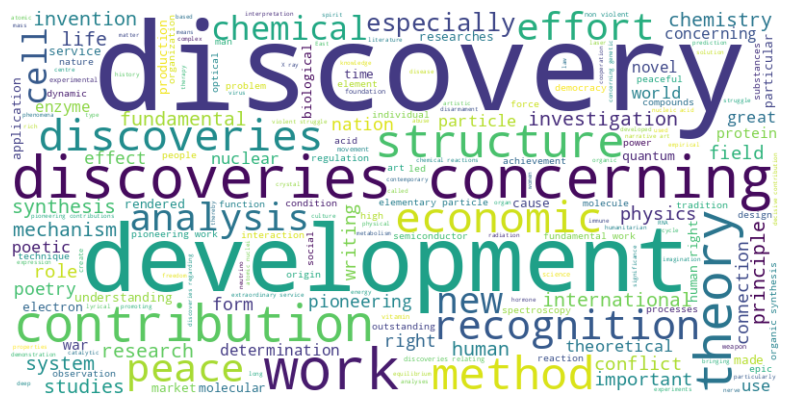

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800 , height = 400 , background_color = 'white').generate(combined_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')
plt.show()

### Clustring

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


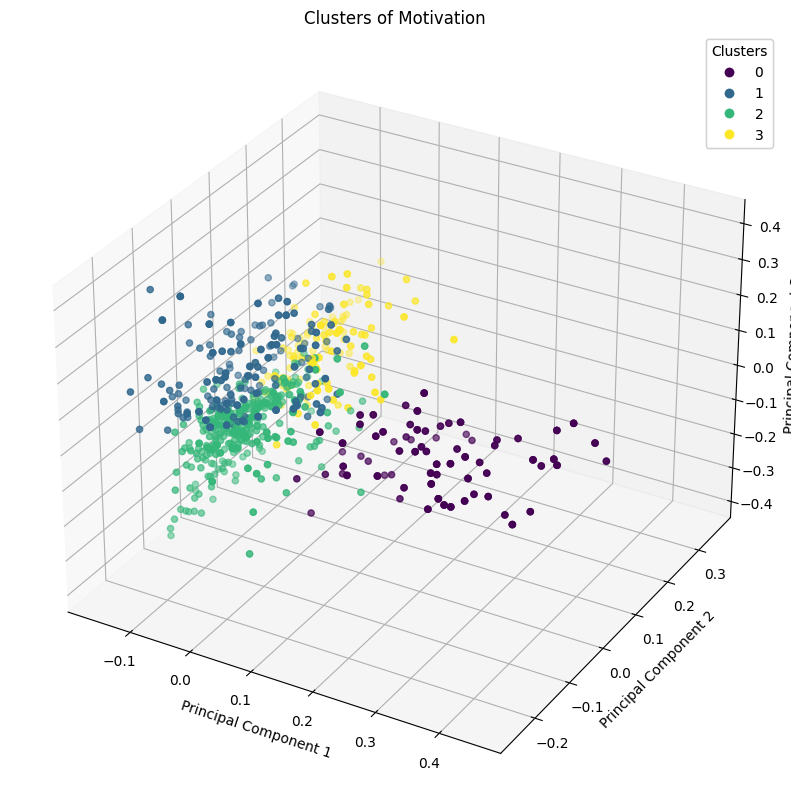

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D



# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(motivation_column)

# Cluster the data with K-Means
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters)
labels = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
df['Cluster'] = labels

# Reduce dimensionality with PCA (3 components)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X.toarray())

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis')
ax.set_title('Clusters of Motivation')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend1)

plt.show()

### Sentiment analysis

In [11]:
from collections import Counter
from textblob import TextBlob

# Initialize counters
sentiment_counts = Counter()

# Analyze sentiment for each text and count sentiment categories
for text in motivation_column:
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    
    if sentiment > 0:
        sentiment_counts['Positive'] += 1
    elif sentiment < 0:
        sentiment_counts['Negative'] += 1
    else:
        sentiment_counts['Neutral'] += 1

# Calculate the total count
total_count = len(motivation_column)

# Print the results
print(f"Total Texts: {total_count}")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment} Texts: {count}")

Total Texts: 989
Neutral Texts: 573
Positive Texts: 339
Negative Texts: 77
